In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.metrics import precision_recall_curve
from sklearn.cross_validation import train_test_split

In [78]:
df = pd.read_csv('/mnt/disk1/HIGGS.csv.gz', iterator=True, chunksize=10000, header=None)

In [79]:
data = next(df)

In [80]:
d = data.values

In [81]:
X = d[:, 1:]
y = d[:, 0]

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()
clf = RandomForestClassifier()

In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)

In [84]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
np.mean(clf.predict(Xtest)==ytest)

0.64439999999999997

In [86]:
clf.classes_

array([ 0.,  1.])

In [87]:
precision_recall_curve?

In [88]:
precision, recall, thres = precision_recall_curve(ytest, clf.predict_proba(Xtest)[:, 1])

In [89]:
print(thres)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


((12,), (12,), (11,))


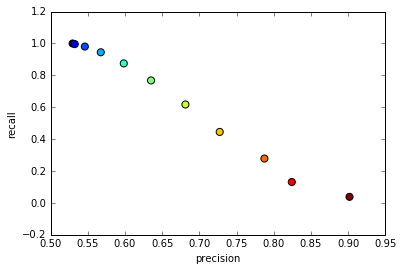

In [94]:
print(precision.shape, recall.shape, thres.shape)
plt.scatter(precision[0:-1], recall[0:-1], c=thres, s=50)
#plt.plot(np.linspace(0, 1), np.linspace(0, 1))
plt.xlabel('precision')
plt.ylabel('recall')